In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [7]:
X,y = make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [11]:
X.shape

(1000, 2)

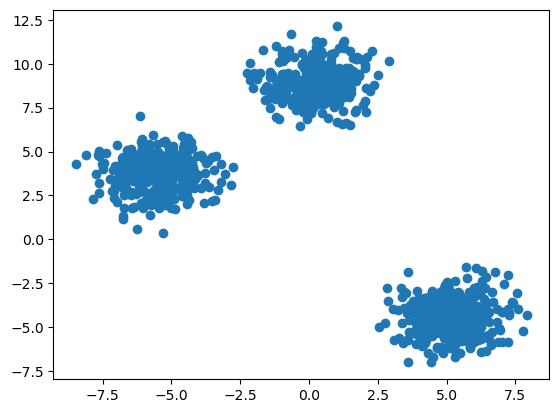

In [13]:
plt.scatter(X[:,0],X[:,1])

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
from sklearn.cluster import KMeans

In [21]:
#elbow meathod to select the k value
wcss=[]
for k in range(1,11):
    kmeans =KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

C:\Users\Piyush Singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Piyush Singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Piyush Singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Piyush Singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to 

In [23]:
wcss


[34827.57682552023,
 7935.4372861454185,
 1319.2730531585605,
 1194.0061837620208,
 1072.6774385886204,
 853.2558345247517,
 776.9494786435909,
 726.1354338983375,
 617.1611887743371,
 556.032208410945]

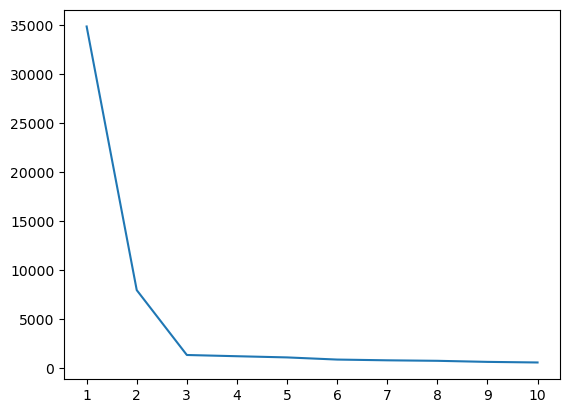

In [25]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.show()

In [27]:
kmeans =KMeans(n_clusters=3,init='k-means++')

In [37]:
y_labels = kmeans.fit_predict(X_train)

C:\Users\Piyush Singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


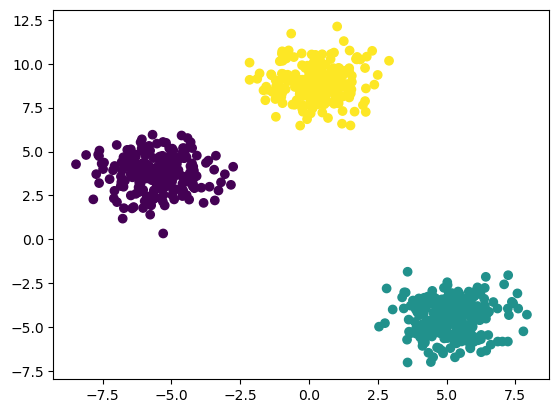

In [39]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [41]:
#automate the k value finder

In [43]:
!pip install kneed

In [49]:
from kneed import KneeLocator

In [57]:
kl =KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

In [61]:
#performence metrics
from sklearn.metrics import silhouette_score

In [67]:
silhouette_coeficient =[]
for k in range(2,11):
    kmeans =KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    score = silhouette_score(X_train,kmeans.labels_)
    silhouette_coeficient.append(score)

C:\Users\Piyush Singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Piyush Singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Piyush Singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\Piyush Singh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to 

In [69]:
silhouette_coeficient

[0.7281443868598331,
 0.8071181203797672,
 0.6453998806728021,
 0.47267736991348186,
 0.4776208792599995,
 0.323044902591733,
 0.3466595461943025,
 0.3246751668302986,
 0.3349254183551278]

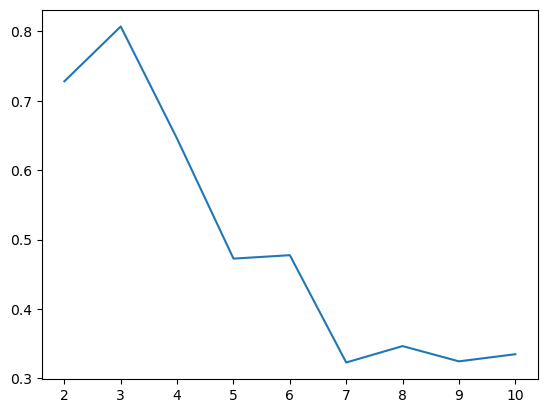

In [71]:
plt.plot(range(2,11),silhouette_coeficient)
plt.xticks(range(2,11))
plt.show()